In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Import files

In [2]:
file = pd.read_csv(r'/home/gdeandrea/Scaricati/Econofisica-RNDM - Foglio1(3).csv', header=28)

In [3]:
file = file.replace(',','.', regex=True)
file = file.drop('chisq_soglie', axis=1)
file = file.drop('chisq_soglini', axis=1)
file = file.drop('commenti', axis=1)

In [4]:
for column in file.columns:
    
    file[column] = pd.to_numeric(file[column])

file.head(20)

,rndm %,soglia,err_soglia,soglino,err_soglino,durate,errore,tempiattesa,errore.1,ampiezze,errore.2,sigma_soglia,sigma_baseline,numero rivolte,numero rivoltini,numero spike,#tick
0,0.0000,137.62,8.37,15.86,3.60,10.81,0.11,19.55,1.42,217.05,16.17,3.0,3.0,31.0,6.0,40.0,980.0
1,0.0025,103.06,10.36,23.11,2.22,10.51,0.13,14.39,1.20,205.62,12.67,3.0,3.0,33.0,12.0,48.0,990.0
2,0.0050,100.29,8.34,16.81,8.03,10.03,0.15,13.47,1.22,171.10,12.93,3.0,3.0,38.0,8.0,50.0,990.0
3,0.0075,107.87,6.26,18.99,6.01,10.07,0.15,11.95,6.98,184.30,9.92,3.0,3.0,34.0,12.0,53.0,980.0
4,0.0100,91.54,7.36,20.83,5.98,10.77,0.21,12.79,1.09,156.78,11.66,3.0,3.0,38.0,9.0,51.0,990.0
5,0.0125,98.42,6.79,20.24,3.87,10.63,0.17,11.72,1.13,157.77,11.71,3.0,3.0,38.0,13.0,63.0,973.0
6,0.0150,91.77,7.26,16.81,4.04,10.49,0.15,12.76,0.83,164.07,10.25,3.0,3.0,35.0,16.0,61.0,990.0
7,0.0175,91.25,6.63,19.81,5.46,10.41,0.18,12.43,0.91,160.63,9.38,3.0,3.0,38.0,12.0,58.0,990.0
8,0.0200,88.00,4.72,14.49,4.02,10.51,0.18,12.61,0.92,147.58,7.47,3.0,3.0,36.0,23.0,71.0,990.0
9,0.0300,75.16,3.71,21.55,3.46,10.56,0.19,8.67,0.58,124.32,5.86,3.0,3.0,41.0,36.0,91.0,990.0


# Correlation

In [5]:
import scipy.stats as stats

pearson_pvalue_dict={}
col_list = []

for col2 in file.columns:
    pearson_coeff, p_value = stats.pearsonr(file[file.columns[0]], file[col2])
    pearson_pvalue_dict['rndm-'+col2] = [pearson_coeff, p_value]
       
pearson_pvalue_df = pd.DataFrame.from_dict(pearson_pvalue_dict,
                                           orient='index',
                                           columns=['Pearson Coeff', 'P-Value'])

pearson_pvalue_df.drop(index='rndm-numero spike',inplace=True)
pearson_pvalue_df.drop(index='rndm-rndm %',inplace=True)
pearson_pvalue_df.drop(index='rndm-errore.2',inplace=True)
pearson_pvalue_df.drop(index='rndm-err_soglia',inplace=True)
pearson_pvalue_df.drop(index='rndm-errore',inplace=True)
pearson_pvalue_df.drop(index='rndm-err_soglino',inplace=True)
pearson_pvalue_df.drop(index='rndm-#tick',inplace=True)
pearson_pvalue_df.drop(index='rndm-errore.1',inplace=True)
pearson_pvalue_df.drop(index='rndm-sigma_baseline',inplace=True)
pearson_pvalue_df.drop(index='rndm-sigma_soglia',inplace=True)
pearson_pvalue_df.sort_values(by=['P-Value'], ascending=True)


/home/gdeandrea/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:3038: RuntimeWarning: invalid value encountered in double_scalars
  r = r_num / r_den


,Pearson Coeff,P-Value
rndm-numero rivoltini,0.950118,6.669391e-07
rndm-ampiezze,-0.944262,1.214166e-06
rndm-tempiattesa,-0.915956,1.099508e-05
rndm-soglia,-0.891387,4.292015e-05
rndm-numero rivolte,0.444960,1.276148e-01
rndm-soglino,0.219418,4.713647e-01
rndm-durate,0.032266,9.166623e-01


# Scatter plot soglie soglini

In [6]:
dataset_scatter = pd.read_excel(r'/home/gdeandrea/Scaricati/soglie_soglini_20.xlsx', sheet_name=None, usecols=[1,2])

In [7]:
dataset_keys = list(dataset_scatter.keys())

In [8]:
soglie_df_list = []
soglini_df_list = []
for i,key in enumerate(dataset_keys):
    if i%2 == 0:
        soglie_df_list.append(dataset_scatter[key])
    else:
        soglini_df_list.append(dataset_scatter[key])   

#soglie[soglie.columns[0]].to_numpy()

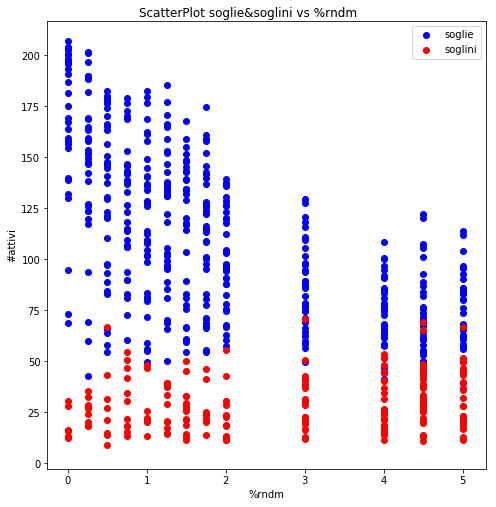

In [9]:
livelli_random = [0,.25,.5,.75,1.,1.25,1.5,1.75,2,3,4,4.5,5]
fig, ax = plt.subplots(1,1, figsize=(7,7))
fig.suptitle('ScatterPlot soglie&soglini vs %rndm',y=1)
for idx, (soglie, soglini) in enumerate(zip(soglie_df_list, soglini_df_list)):
    idx_list = []
    for i in range(len(soglie)):
        idx_list.append(livelli_random[idx])
    if idx==1:
        ax.scatter(np.array(idx_list), soglie[soglie.columns[0]].to_numpy(), c='b', label='soglie')
    else:
        ax.scatter(np.array(idx_list), soglie[soglie.columns[0]].to_numpy(), c='b')
    
    idx_list = []
    for i in range(len(soglini)):
        idx_list.append(livelli_random[idx])
    if idx==1:
        ax.scatter(np.array(idx_list), soglini[soglini.columns[0]].to_numpy(), c='r', label='soglini')
    else:
        ax.scatter(np.array(idx_list), soglini[soglini.columns[0]].to_numpy(), c='r')

ax.set_xlabel('%rndm')
ax.set_ylabel('#attivi')
ax.legend()
fig.tight_layout()
plt.show()

# Soglia vs GradoRNDM vs #Rivolte

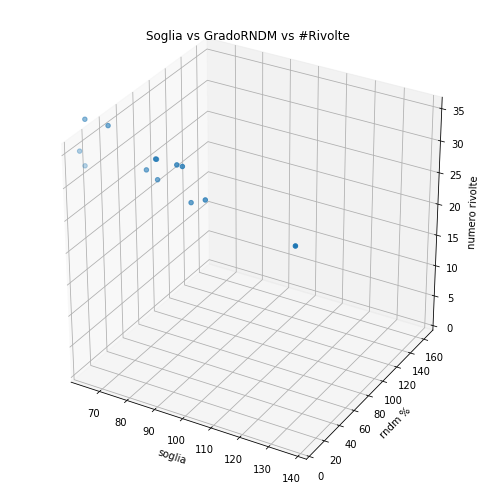

In [35]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(file[file.columns[1]], file[file.columns[0]], file[file.columns[-4]], depthshade=True)
ax.set_xlabel(file.columns[1])
ax.set_ylabel(file.columns[0])
ax.set_zlabel(file.columns[-4])
ax.set_title('Soglia vs GradoRNDM vs #Rivolte')
ax.set_ybound(0,170)
ax.set_zbound(0,36)
plt.tight_layout()


In [33]:
dir(ax)

['M',
 '_3d_extend_contour',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_add_text',
 '_adjustable',
 '_agg_filter',
 '_alpha',
 '_anchor',
 '_animated',
 '_aspect',
 '_autoscaleXon',
 '_autoscaleYon',
 '_autoscaleZon',
 '_autotitlepos',
 '_axes',
 '_axes_class',
 '_axes_locator',
 '_axis3don',
 '_axisbelow',
 '_button_press',
 '_button_release',
 '_cachedRenderer',
 '_cids',
 '_clipon',
 '_clippath',
 '_connected',
 '_contains',
 '_current_image',
 '_determine_lims',
 '_draw_grid',
 '_facecolor',
 '_frameon',
 '_gci',
 '_gen_axes_patch',
 '_gen_axes_spines',
 '_generate_normals',
 '_get_axis_list',
 '_get_lines',
 '_get_patches_f

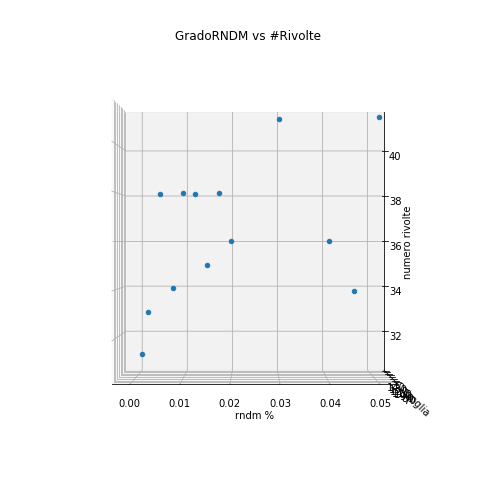

In [11]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(file[file.columns[0]], file[file.columns[1]], file[file.columns[-4]], depthshade=False)
ax.set_xlabel(file.columns[0])
ax.set_ylabel(file.columns[1])
ax.set_zlabel(file.columns[-4])
ax.set_title('GradoRNDM vs #Rivolte')
ax.view_init(0, 270)
plt.tight_layout()
plt.show()


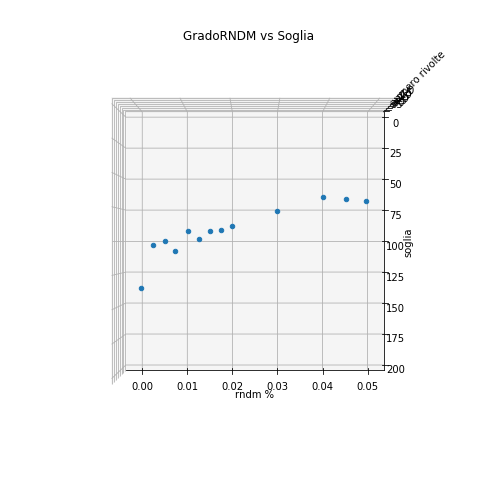

In [12]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(file[file.columns[0]], file[file.columns[1]], file[file.columns[-4]], depthshade=False)
ax.set_xlabel(file.columns[0])
ax.set_ylabel(file.columns[1])
ax.set_zlabel(file.columns[-4])
ax.set_title('GradoRNDM vs Soglia')
ax.set_ybound(0,200)
ax.set_zbound(0,36)
ax.view_init(270, 270)
plt.tight_layout()
plt.show()


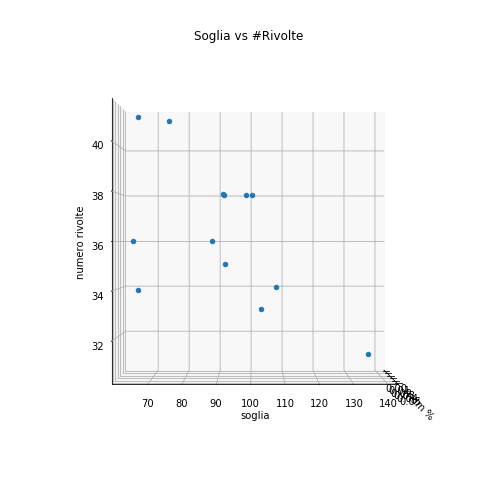

In [26]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(file[file.columns[0]], file[file.columns[1]], file[file.columns[-4]], depthshade=False)
ax.set_xlabel(file.columns[0])
ax.set_ylabel(file.columns[1])
ax.set_zlabel(file.columns[-4])
ax.set_title('Soglia vs #Rivolte')
ax.view_init(0, 0)
plt.tight_layout()
plt.show()

# Soglini vs GradoRNDM vs #Rivoltini

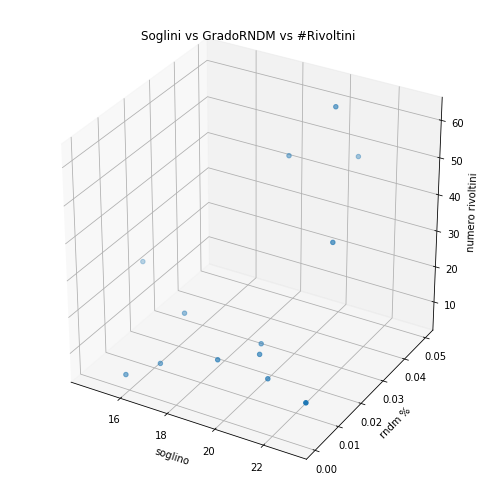

In [13]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(file[file.columns[3]], file[file.columns[0]], file[file.columns[-3]], depthshade=True)
ax.set_xlabel(file.columns[3])
ax.set_ylabel(file.columns[0])
ax.set_zlabel(file.columns[-3])
ax.set_title('Soglini vs GradoRNDM vs #Rivoltini')
#ax.set_ybound(0,170)
#ax.set_zbound(0,36)
plt.tight_layout()
plt.show()


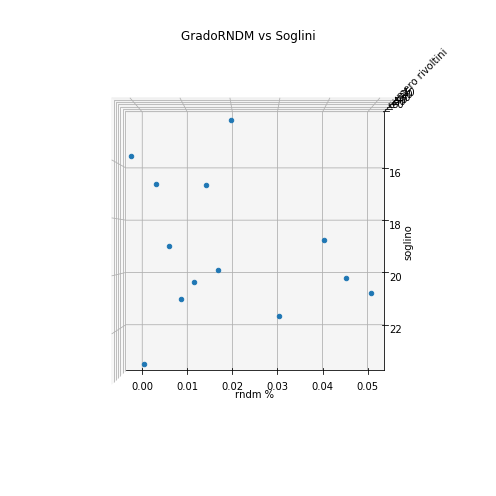

In [14]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(file[file.columns[0]], file[file.columns[3]], file[file.columns[-3]], depthshade=False)
ax.set_xlabel(file.columns[0])
ax.set_ylabel(file.columns[3])
ax.set_zlabel(file.columns[-3])
ax.set_title('GradoRNDM vs Soglini')
#ax.set_ybound(0,170)
#ax.set_zbound(0,36)
ax.view_init(270, 270)
plt.tight_layout()
plt.show()


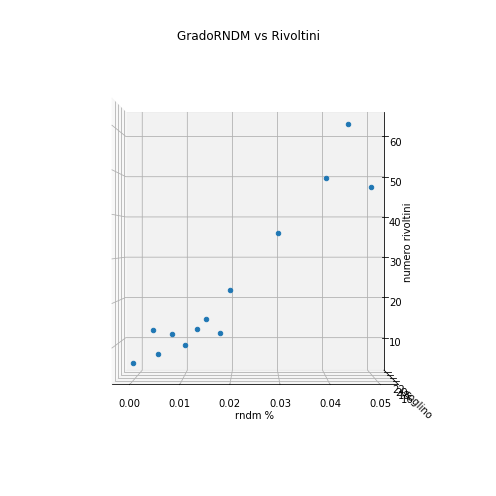

In [15]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(file[file.columns[0]], file[file.columns[3]], file[file.columns[-3]], depthshade=False)
ax.set_xlabel(file.columns[0])
ax.set_ylabel(file.columns[3])
ax.set_zlabel(file.columns[-3])
ax.set_title('GradoRNDM vs Rivoltini')
#ax.set_ybound(0,170)
#ax.set_zbound(0,36)
ax.view_init(0, 270)
plt.tight_layout()
plt.show()


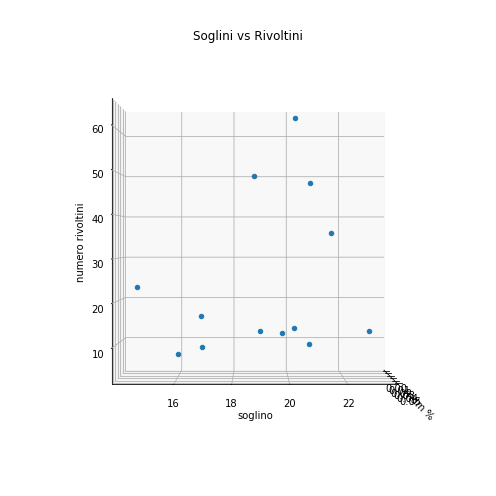

In [28]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(file[file.columns[0]], file[file.columns[3]], file[file.columns[-3]], depthshade=False)
ax.set_xlabel(file.columns[0])
ax.set_ylabel(file.columns[3])
ax.set_zlabel(file.columns[-3])
ax.set_title('Soglini vs Rivoltini')
#ax.set_ybound(0,170)
#ax.set_zbound(0,36)
ax.view_init(0, 0)
plt.tight_layout()
plt.show()

# #Rivoltini vs GradoRNDM vs #Rivolte

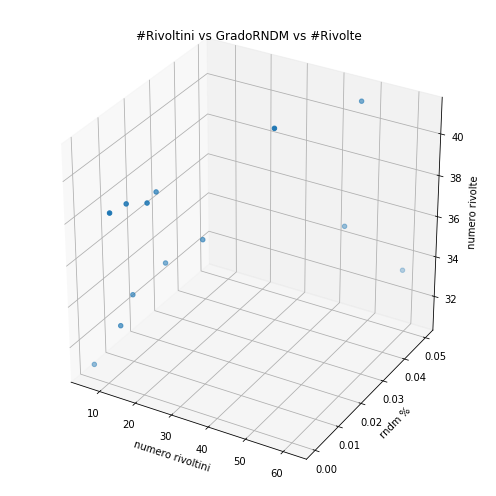

In [16]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(file[file.columns[-3]], file[file.columns[0]], file[file.columns[-4]], 
           #c=file[file.columns[-4]], 
           depthshade = True)
ax.set_xlabel(file.columns[-3])
ax.set_ylabel(file.columns[0])
ax.set_zlabel(file.columns[-4])
ax.set_title('#Rivoltini vs GradoRNDM vs #Rivolte')
#ax.set_ybound(0,170)
#ax.set_zbound(0,36)
plt.tight_layout()
plt.show()


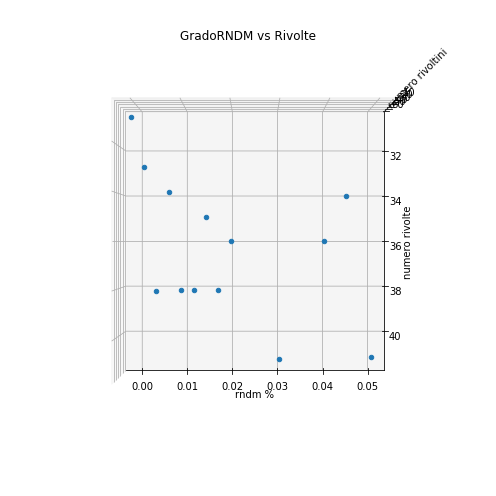

In [17]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(file[file.columns[0]], file[file.columns[-4]], file[file.columns[-3]], depthshade=False)
ax.set_xlabel(file.columns[0])
ax.set_ylabel(file.columns[-4])
ax.set_zlabel(file.columns[-3])
ax.set_title('GradoRNDM vs Rivolte')
#ax.set_ybound(0,170)
#ax.set_zbound(0,36)
ax.view_init(270, 270)
plt.tight_layout()
plt.show()

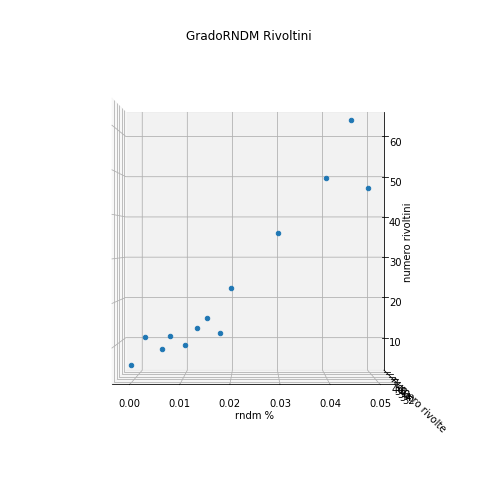

In [18]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(file[file.columns[0]], file[file.columns[-4]], file[file.columns[-3]], depthshade=False)
ax.set_xlabel(file.columns[0])
ax.set_ylabel(file.columns[-4])
ax.set_zlabel(file.columns[-3])
ax.set_title('GradoRNDM Rivoltini')
#ax.set_ybound(0,170)
#ax.set_zbound(0,36)
ax.view_init(0, 270)
plt.tight_layout()
plt.show()


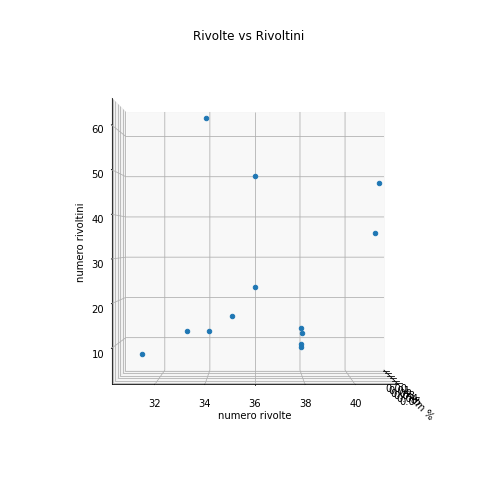

In [30]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(file[file.columns[0]], file[file.columns[-4]], file[file.columns[-3]], depthshade=False)
ax.set_xlabel(file.columns[0])
ax.set_ylabel(file.columns[-4])
ax.set_zlabel(file.columns[-3])
ax.set_title('Rivolte vs Rivoltini')
#ax.set_ybound(0,170)
#ax.set_zbound(0,36)
ax.view_init(0, 0)
plt.tight_layout()
plt.show()

# Plot metriche rivolte vs grado rndm

## Valori Soglie

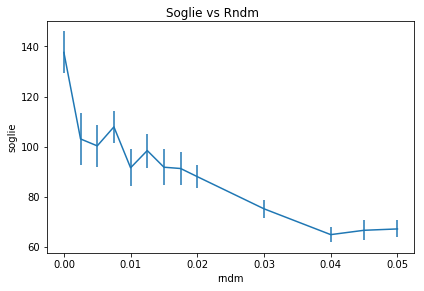

In [19]:
plt.suptitle('Soglie vs Rndm', y=1)
plt.errorbar(file[file.columns[0]], file[file.columns[1]], yerr=file[file.columns[2]])
plt.ylabel('soglie')
plt.xlabel('rndm')
plt.tight_layout()
plt.show()

## Soglini

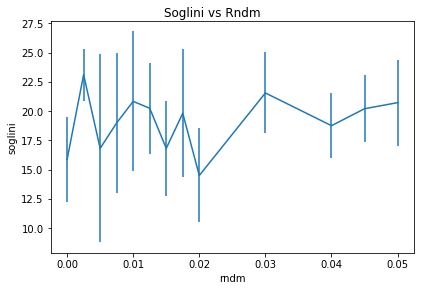

In [20]:
plt.suptitle('Soglini vs Rndm', y=1)
plt.errorbar(file[file.columns[0]], file['soglino'], yerr=file['err_soglino'])
plt.ylabel('soglini')
plt.xlabel('rndm')
plt.tight_layout()
plt.show()

## Ampiezze

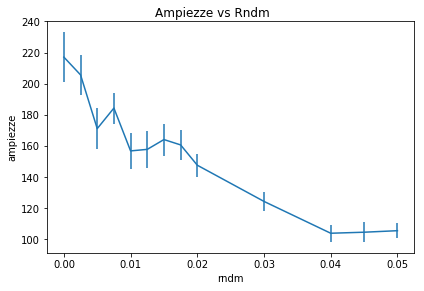

In [21]:
plt.suptitle('Ampiezze vs Rndm', y=1)
plt.errorbar(file[file.columns[0]], file['ampiezze'], yerr=file['errore.2'])
plt.ylabel('ampiezze')
plt.xlabel('rndm')
plt.tight_layout()
plt.show()

## Durate

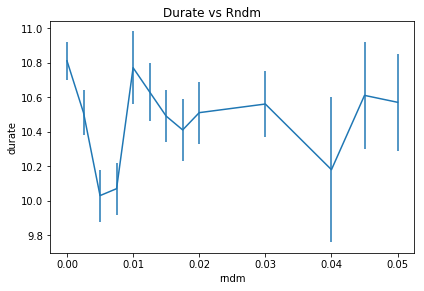

In [22]:
plt.suptitle('Durate vs Rndm', y=1)
plt.errorbar(file[file.columns[0]], file['durate'], yerr=file['errore'])
plt.ylabel('durate')
plt.xlabel('rndm')
plt.tight_layout()
plt.show()

## Tempi Attesa

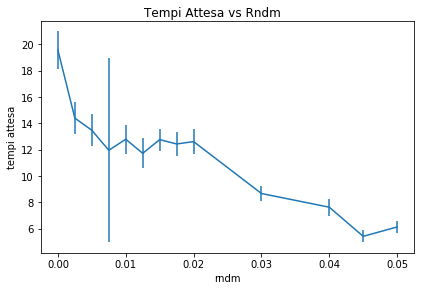

In [23]:
plt.suptitle('Tempi Attesa vs Rndm', y=1)
plt.errorbar(file[file.columns[0]], file['tempiattesa'], yerr=file['errore.1'])
plt.ylabel('tempi attesa')
plt.xlabel('rndm')
plt.tight_layout()
plt.show()